# Product Defects

For this exercise, we are in charge of monitoring the number of products from a specific factory. We've been told that the number of defects on a given day is 7. So in this case, the expected value is 7 defects per day.

We will investigate certain attributes of the Poisson distribution to get an intuition for how many defective objects we should expect to see in a given amount of time.

## Distribution in Theory

1. Creating a variable called `lam` that represents the rate parameter of our distribution and a variable `x` which represents the x-axis on the distribution.

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

lam = 7
x = np.arange(0, 20)

2. We know that the rate parameter of a Poisson distribution is equal to the expected value. So in our factory, the rate parameter would equal the expected number of defects on a given day. How often we might observe the exact expected number of defects?

   Let's calculate and print the probability of observing exactly `lam` defects on a given day.

0.15


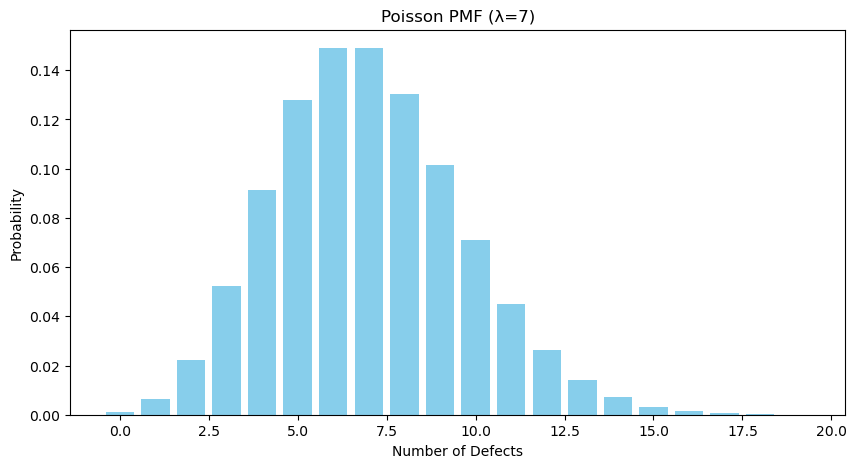

In [2]:
exact_expected_number_defects = stats.poisson.pmf(7, 7)
print(exact_expected_number_defects.round(2))

pmf_values = stats.poisson.pmf(x, lam)
plt.figure(figsize=(10, 5))
plt.bar(x, pmf_values, color='skyblue')
plt.title('Poisson PMF (λ=7)')
plt.xlabel('Number of Defects')
plt.ylabel('Probability')
plt.show()

_So, the probability of observing the exact expected number of defects in a given day is around 15%_

3. Let's imagine that our boss said that having 4 or fewer defects on a given day is an exceptionally good day. How often that might happen?

   Let's calculate and print the probability of having one of those days.

0.17


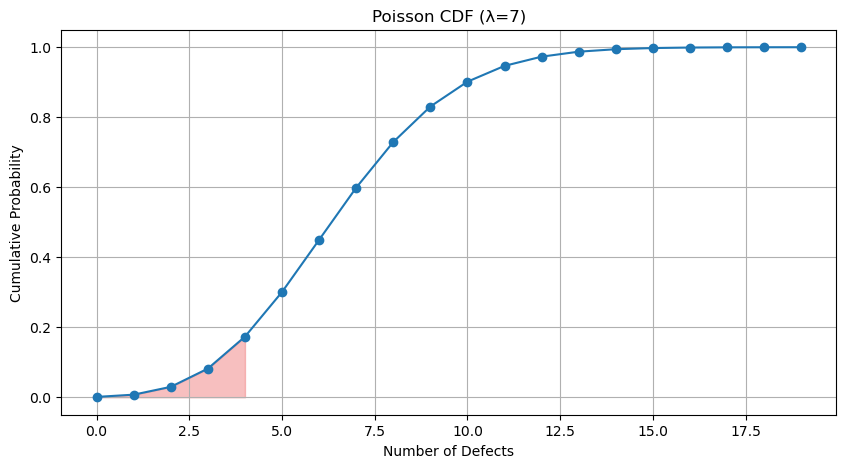

In [4]:
#Getting 4 or fewer defects on a given day is an exceptionally good day.
expecting_4_or_fewer_defects = stats.poisson.cdf(4, 7)
print(expecting_4_or_fewer_defects.round(2))

cdf_values = stats.poisson.cdf(x, lam)
plt.figure(figsize=(10, 5))
plt.plot(x, cdf_values, marker='o', linestyle='-')
plt.fill_between(x, cdf_values, where=(x <= 4), color='lightcoral', alpha=0.5)
plt.title('Poisson CDF (λ=7)')
plt.xlabel('Number of Defects')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

_The probability of getting 4 or fewer defects per day is around 17%, which is low, so we should expect more defects on most days_ 

4. On the other hand, our boss said that having more than 9 defects on a given day is considered a bad day.

   Let's calculate and print the probability of having one of these bad days.

0.17


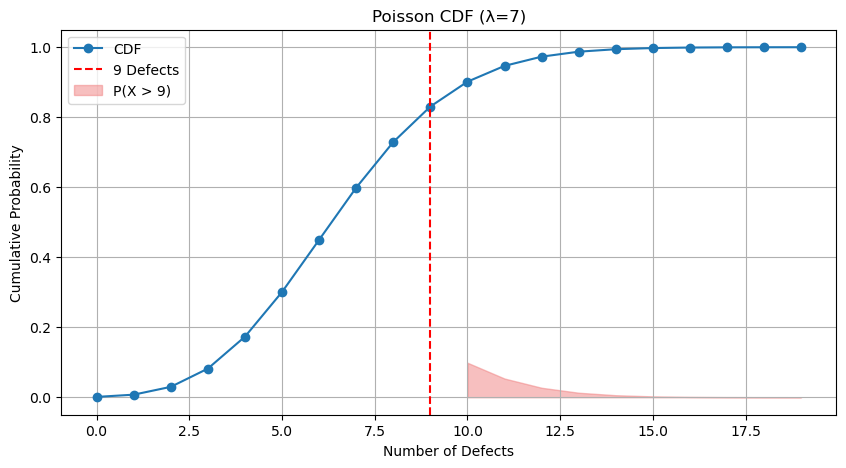

In [5]:
#Getting more than 9 defects on any given day is considered a bad day.
expecting_more_than_9_defects = 1 - stats.poisson.cdf(9, 7)
print(expecting_more_than_9_defects.round(2))

cdf_values = stats.poisson.cdf(x, lam)
plt.figure(figsize=(10, 5))
plt.plot(x, cdf_values, marker='o', linestyle='-', label='CDF')
plt.axvline(x=9, color='r', linestyle='--', label='9 Defects')
plt.fill_between(x, 1 - cdf_values, where=(x > 9), color='lightcoral', alpha=0.5, label='P(X > 9)')
plt.title('Poisson CDF (λ=7)')
plt.xlabel('Number of Defects')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.legend()
plt.show()

_The probability of getting more than 9 defects per day is around 17%, which is low, so we should expect less on most days. The y-axis value for 9 defects on the CDF is the probability of having 9 or fewer defects, and the shaded area represents the complement (1 - CDF(9)), which is the probability of having more than 9 defects._ 

## Distribution in Practice

5. Let's look at what this might look like in practice.

   Let's create a variable called `year_defects` which is a dataset that contains 365 random values from the Poisson distribution.

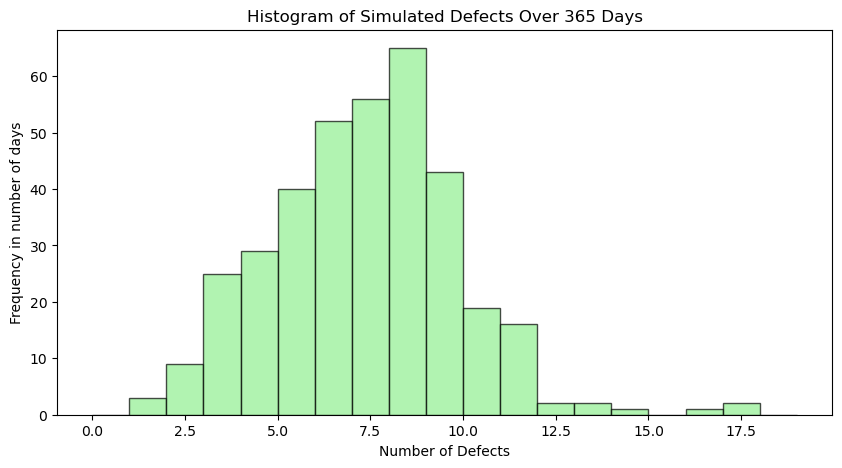

In [6]:
#Creating a dataset
year_defects = stats.poisson.rvs(7, size=365)

year_defects = stats.poisson.rvs(lam, size=365)
plt.figure(figsize=(10, 5))
plt.hist(year_defects, bins=range(0, 20), color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Histogram of Simulated Defects Over 365 Days')
plt.xlabel('Number of Defects')
plt.ylabel('Frequency in number of days')
plt.show()

6. Now, let's take a look at our new dataset and print the first 20 values.

In [7]:
#consulting the first 20 values in the dataset for analysis
year_defects[:20]

array([ 3,  8,  6, 12, 11,  5,  6,  7, 11,  7,  8,  6,  9,  4,  6,  6,  3,
        7,  8,  9], dtype=int64)

7. If we expect 7 defects on a given day, what is the total number of defects we would expect over 365 days?

In [8]:
total_defects_in_365_days = 7*365
total_defects_in_365_days

2555

_We could expect 2555 product defects over 365 days._

8. Now let's calculate and print the total sum of the dataset `year_defects` and check how does this compare to the total number of defects we expected over 365 days.

In [9]:
total_sum_of_dataset = sum(year_defects)
total_sum_of_dataset

2503

_The total sum of year_defects can vary because it is generated from a Poisson distribution, which produces random values. This means the actual number of defects can fluctuate around the expected value. On the other hand, total_defects_in_365_days is a fixed value calculated as the expected number of defects (7) multiplied by 365 days, representing the average or expected total defects over a year. The difference between the two highlights the variability inherent in random processes_

Let's check if the results are align with our theoretical expectations.

In [10]:
difference_between_both = total_defects_in_365_days - total_sum_of_dataset
difference_between_both

52

>[!NOTE]
> A smaller difference between the total sum of year_defects and total_defects_in_365_days indicates that the simulated data is closely aligned with the theoretical expectations. It suggests that the random variation in the data is minimal, and the observed defects are close to the expected average.d.

>[!NOTE]
> If the difference is negative, it means the total sum of year_defects is greater than total_defects_in_365_days. This indicates that the actual number of defects observed in the simulation is higher than the expected average, which can sometimes result in more defects than anticipated.

9. Now, let's calculate and print the average number of defects per day from our simulated dataset and check how this compares to the expected average number of defects each day that we know from the given rate parameter of the Poisson distribution.

7.19


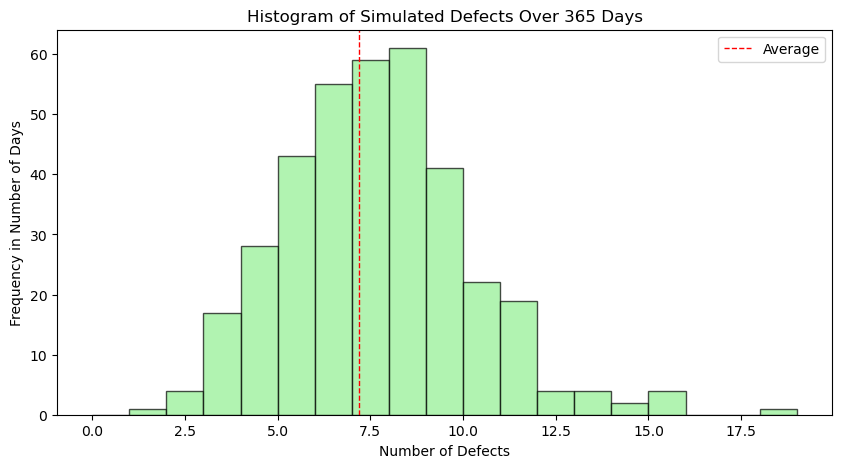

In [14]:
#Calculating the average number of defects per day from the simulated dataset. 
average_numb_defects_per_day = np.mean(year_defects)
print(average_numb_defects_per_day.round(2))

year_defects = stats.poisson.rvs(lam, size=365)
# Histogram with Average Line
plt.figure(figsize=(10, 5))
plt.hist(year_defects, bins=range(0, 20), color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(year_defects), color='red', linestyle='dashed', linewidth=1, label='Average')
plt.title('Histogram of Simulated Defects Over 365 Days')
plt.xlabel('Number of Defects')
plt.ylabel('Frequency in Number of Days')
plt.legend()
plt.show()

_This does not differ to much from the given rate parameter of the Poisson distribution(7). The red dashed line indicates the average number of defects per day from the simulated dataset. This helps visually compare the average to the distribution of defects._

10. We're worried about what the highest amount of defects in a single day might be because that would be a hectic day.

    Let's check the maximum value of `year_defects`.

In [15]:
#Checking what is the highest amount of defects in a single day because we are expecting a  hectic day
highest_amount_of_defects = max(year_defects)
highest_amount_of_defects

19

_The highest amount of defects in a single hectic day is 19. The `highest_amount_of_defects = max(year_defects)` can vary because the year_defects dataset is generated using the Poisson distribution, which produces random values. Each time the dataset is generated, the specific values, including the maximum, can differ due to the inherent randomness of the Poisson process_.

11. It would probably be super busy if there were that many defects on a single day. Hopefully, it is a rare event!

    Let's calculate and print the probability of observing that maximum value or more from the Poisson(7) distribution.

In [16]:
#probability of observing the maximum value or more from our distribution
maximum_value_or_more = 1 - stats.poisson.cdf(14, 7)
maximum_value_or_more

0.005717202492495965

_The probability of observing the maximum value or more from our distribution is 0.005717202492495965. Barely inexistent_

12. At this point, we have now explored the Poisson distribution and even worked with some simulated data. 

    Now let's say we want to know how many defects in a given day would put us in the 90th percentile of the Poisson(7) distribution.
    
    `percentile` is equal to the desired percentile (a decimal between 0 and 1), and `lambda` is the lambda parameter of the Poisson distribution. This function is essentially the inverse of the CDF.
    
    Let's calculate and print the number of defects that would put us in the 90th percentile for a given day. In other words, on 90% of days, we will observe fewer defects than this number.

10.0


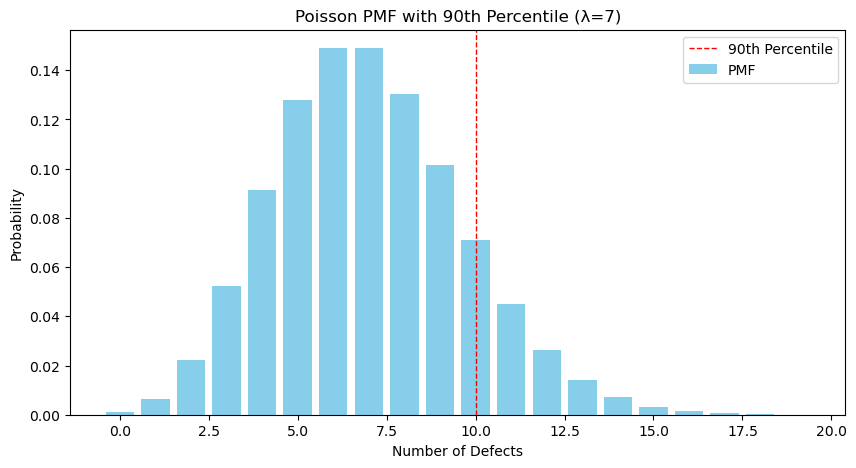

In [17]:
#We want to know how many defects in a given day would put us in the 90th percentile of the Poisson distribution
percentile_90th = stats.poisson.ppf(0.90, 7)
print(percentile_90th)

plt.figure(figsize=(10, 5))
plt.bar(x, pmf_values, color='skyblue', label='PMF')
plt.axvline(percentile_90th, color='red', linestyle='dashed', linewidth=1, label='90th Percentile')
plt.title('Poisson PMF with 90th Percentile (λ=7)')
plt.xlabel('Number of Defects')
plt.ylabel('Probability')
plt.legend()
plt.show()

_10 is the number of defects that correspond to the 90th percentile of a poisson distribution with a expected value of 7. This means that on 90% of days, the number of defects would be less than or equal to this value_.

13. Now let's see what proportion of our simulated dataset `year_defects` is greater than or equal to the number we calculated in the previous step.

    By definition of a percentile, we would expect 1 - .90, or about 10% of days to be in this range.

0.15


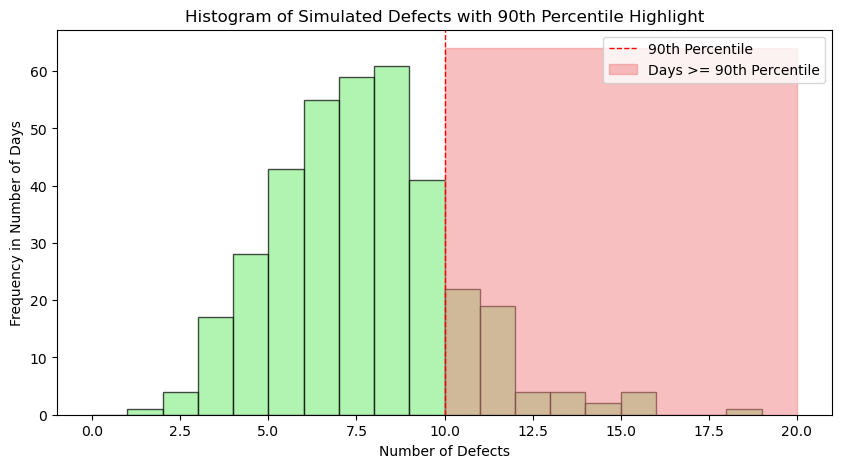

In [20]:
proportion_of_simulated_dataset = sum(year_defects >= percentile_90th)/len(year_defects)
print(proportion_of_simulated_dataset.round(2))

plt.figure(figsize=(10, 5))
plt.hist(year_defects, bins=range(0, 20), color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(percentile_90th, color='red', linestyle='dashed', linewidth=1, label='90th Percentile')
plt.fill_betweenx([0, plt.gca().get_ylim()[1]], percentile_90th, 20, color='lightcoral', alpha=0.5, label='Days >= 90th Percentile')
plt.title('Histogram of Simulated Defects with 90th Percentile Highlight')
plt.xlabel('Number of Defects')
plt.ylabel('Frequency in Number of Days')
plt.legend()
plt.show()

_0.15 is the proportion of days that have defects greater or equal to the 90th percentile. This is slightly higher than the expected 10% due to the randomness in the Poisson distribution and the finite size of the dataset (365 days)._